In [18]:
library(ggplot2)
library(data.table)
theme_set(theme_bw())
# library(ggpubr)

In [19]:
setwd('~/m/msingle/mess/124_singlem-benchmarking')

In [20]:
# from plot.ipynb in folder 2
novelty_benchmark_results = fread('2_phylogenetic_novelty/bray_curtis.tsv')
table(novelty_benchmark_results$tool)


    kaiju    kraken     map2b  metabuli metaphlan     motus   singlem  sourmash 
      840       840       840       840       840       840       840       840 

In [21]:
tools = c('singlem', 'metaphlan', 'motus', 'kraken', 'sourmash', 'kaiju', 'map2b', 'metabuli')
# Tools that do not have the correct taxonomy are tested only at the domain level. eg. Kaiju has NCBI taxonomy and MAP2B uses GTDB v202, mOTUs sometimes has incompatible strings
correct_taxonomy_tools = c('singlem', 'metaphlan', 'kraken', 'sourmash', 'metabuli')

publication_names = data.table(
    tool = tools,
    publication_name = c('SingleM', 'MetaPhlAn', 'mOTUs', 'Kraken2', 'sourmash', 'Kaiju', 'MAP2B', 'Metabuli')
)

tools2_order = publication_names$publication_name
name_to_publication_name = function(names, correct_taxonomy_only=F){
    to_return = c()
    for (name in names){
        to_return = c(to_return, publication_names[tool==name]$publication_name)
    }
    if (correct_taxonomy_only){
        return(factor(to_return, levels=publication_names[tool %in% correct_taxonomy_tools]$publication_name))
    } else {
        return(factor(to_return, levels=publication_names$publication_name))
    }
}

correct_taxonomy_tools_publication_names = name_to_publication_name(correct_taxonomy_tools)

In [22]:
orders = c('kingdom','phylum','class','order','family','genus','species')
novelty_benchmark_results[, rank := factor(rank, levels=orders)]
novelty_benchmark_results[, novelty_category := factor(novelty_category, levels=orders)]

novelty_benchmark_results[, tool := factor(tool, levels=tools)]
novel_orders = gsub('^','novel ',orders)
novelty_benchmark_results[, novelty_category_novel := factor(novelty_category_novel, levels=novel_orders)]

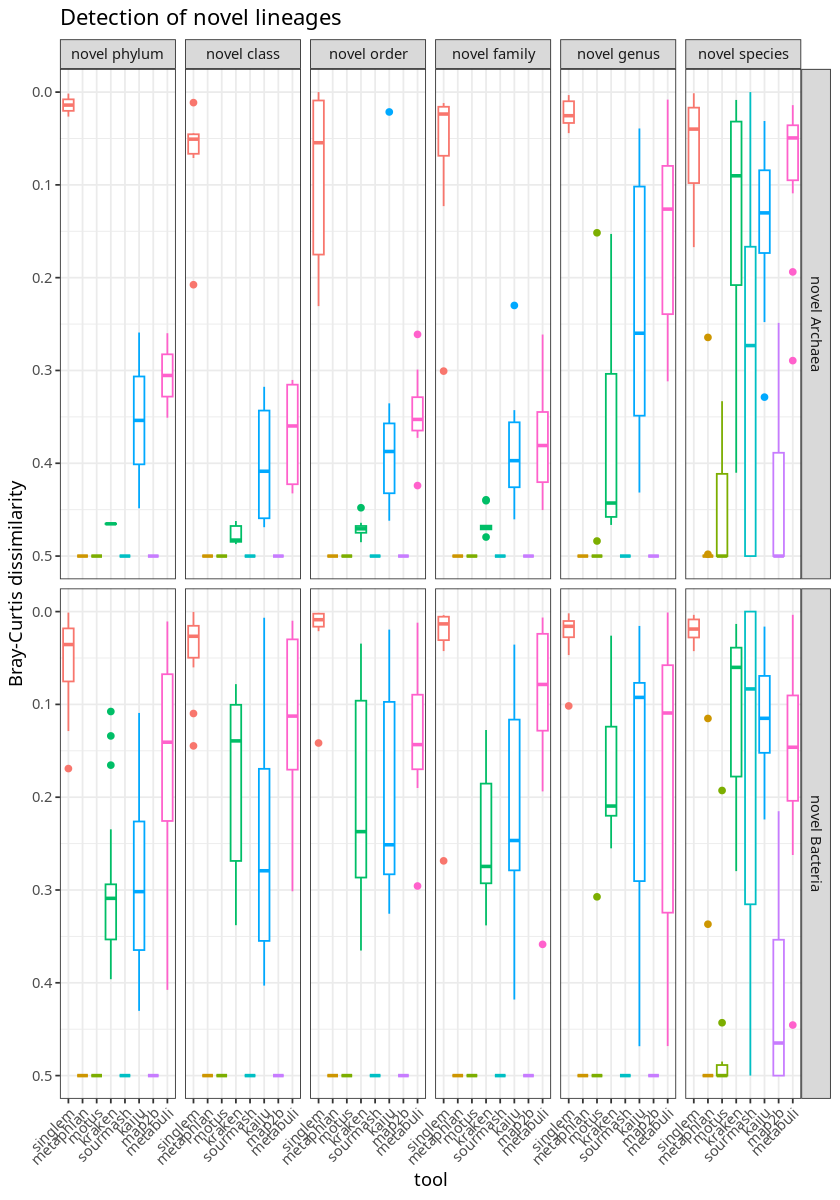

In [23]:
qplot(data=novelty_benchmark_results[rank=='kingdom'], tool, value, geom='boxplot', main='Detection of novel lineages', colour=tool, ylab='Bray-Curtis dissimilarity')+facet_grid(kingdom~novelty_category_novel)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_y_reverse()

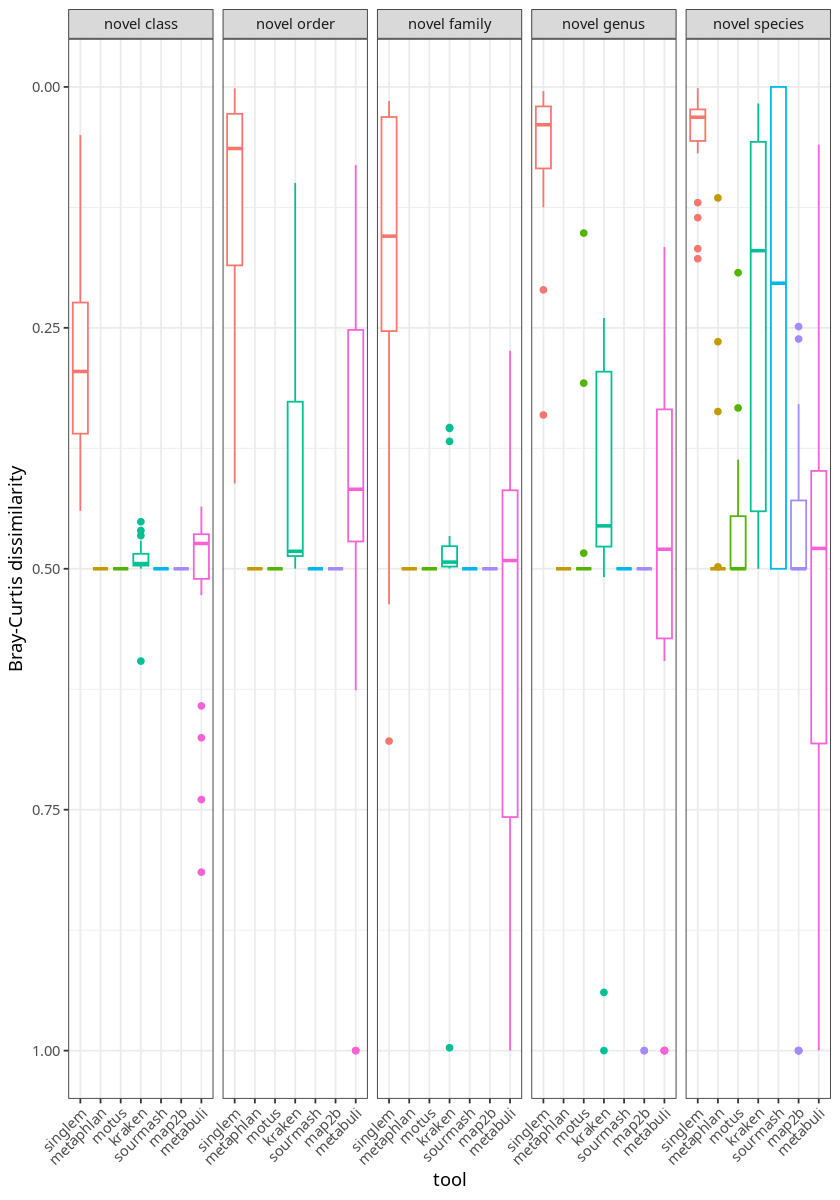

In [24]:
# What about when the rank equals one level above the novelty category?

# novelty_benchmark_results
# novelty_benchmark_results[tool != 'kaiju'][novelty_category != 'phylum'][rank==orders[as.numeric(novelty_category)-1]]
qplot(data=novelty_benchmark_results[tool != 'kaiju'][novelty_category != 'phylum'][rank==orders[as.numeric(novelty_category)-1]], colour=tool, ylab='Bray-Curtis dissimilarity', tool, value, geom='boxplot')+facet_grid(.~novelty_category_novel)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_y_reverse()

In [25]:
# Read non-novelty results
marine = fread('1_novel_strains/bray-curtis.csv')

In [26]:
runtimes = fread('1_novel_strains/runtime.csv')

In [28]:
novelty_benchmark_results[, tool2 := name_to_publication_name(tool)]
marine[, tool2 := name_to_publication_name(tool)]
runtimes[, tool2 := name_to_publication_name(tool)]

my_colours = c(
#1b9e77 Dark2
#d95f02
#7570b3
#e7298a
#66a61e
#e6ab02
#a6761d
#666666
'#e7298a',
'#1b9e77',
'#d95f02',
'#7570b3',
'#66a61e',
'#e6ab02',
'#a6761d',
'#666666'

#     '#e7298a','#1b9e77', #?
# '#d95f02',
# '#7570b3',

# '#66a61e',
# '#e6ab02'
)
options(repr.plot.width=7, repr.plot.height=10)

# library(ggbreak)
runtimes2 = runtimes[threads==1, .(mins=mean(s/60), max_rss=mean(max_rss/1000)), by=.(tool2)]

In [29]:
# ggbreak doesn't get applied so can't use ggarrange


# rp = qplot(data=runtimes2, xlab='', tool2, mins, geom='col', fill=tool2, ylab='Runtime (mins)') + theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_fill_manual(breaks=tools2_order, values=my_colours)+scale_y_break(c(750,6200))

# library(patchwork)

# ggarrange(
#     qplot(data=novelty_benchmark_results[rank=='kingdom'], xlab='', tool2, value, geom='boxplot', colour=tool2, ylab='Bray-Curtis dissimilarity')+facet_grid(kingdom~novelty_category_novel)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none') +scale_color_manual(breaks=tools2_order, values=my_colours)+scale_y_reverse(),

#     qplot(data=novelty_benchmark_results[tool != 'kaiju'][rank==orders[as.numeric(novelty_category)-1]], colour=tool2, ylab='Dissimilarity', tool2, value, xlab='', geom='boxplot')+facet_grid(.~novelty_category_novel)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_y_reverse() +scale_color_manual(breaks=tools2_order, values=my_colours),

#     ggarrange(
#         qplot(data=marine[rank=='species'], xlab='', ylim=c(0.6,0), tool2, value, geom='boxplot', colour=tool2, ylab='Dissimilarity') + theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_color_manual(breaks=tools2_order, values=my_colours),

#         rp,

#         qplot(data=runtimes[threads==1], xlab='', tool2, max_rss/1000, geom='boxplot', colour=tool2, ylab='Memory (GB)') + theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_color_manual(breaks=tools2_order, values=my_colours),

#         labels=c('C','D','E'),
#         nrow=1
#     ),

#     nrow=3,
#     labels=c('A','B'),
#     heights=c(2,1.2,1.2)
# )

In [30]:
runtimes[, mean(s/60), by=tool2]

tool2,V1
<fct>,<dbl>
SingleM,9.270211
MetaPhlAn,22.341895
mOTUs,17.866923
Kraken2,11.180433
sourmash,61.617167
Kaiju,16.832812
MAP2B,88.773832
Metabuli,32.540987


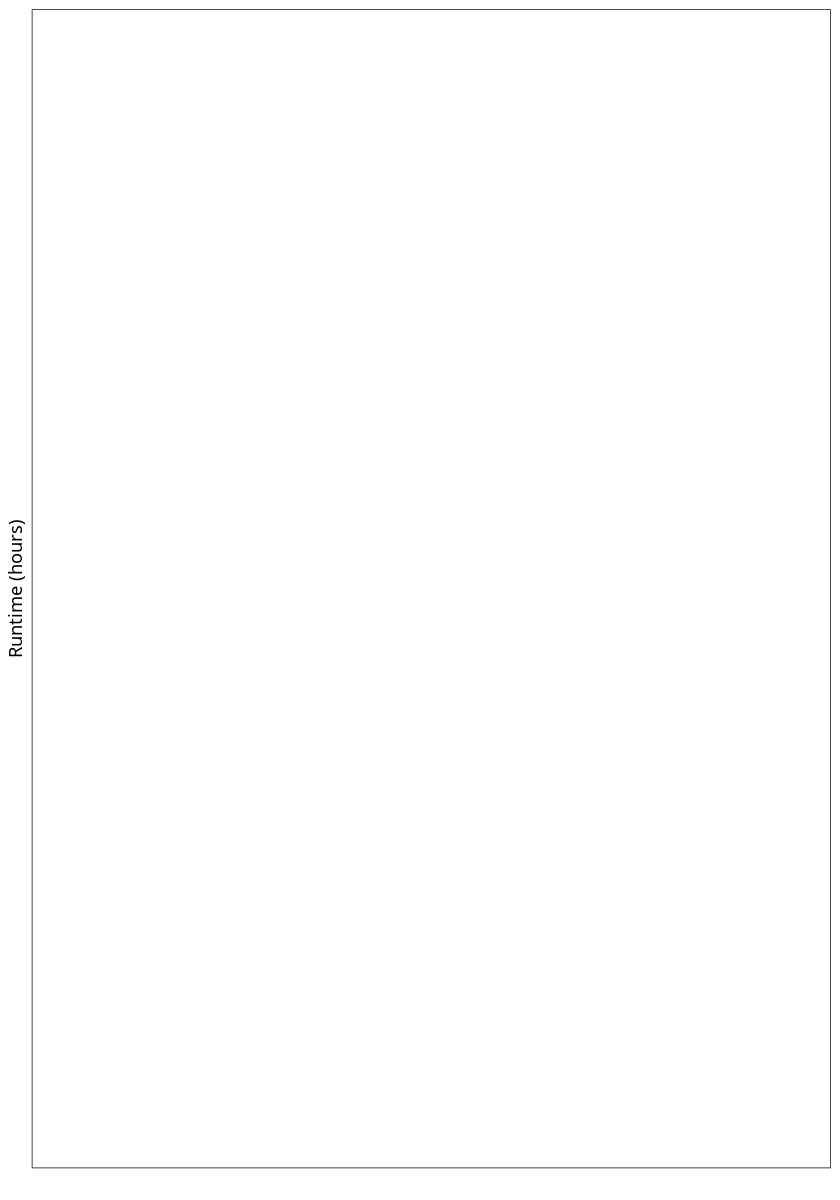

In [31]:
qplot(data=runtimes2[tool2 %in% correct_taxonomy_tools_publication_names], xlab='', tool2, mins/60, geom='col', fill=tool2, ylab='Runtime (hours)') + theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_fill_manual(breaks=tools2_order, values=my_colours)#+scale_y_break(c(750,6200))

In [32]:
library(patchwork)

plot1 = qplot(data=novelty_benchmark_results[rank=='kingdom'], xlab='', tool2, value, geom='boxplot', colour=tool2, ylab='Bray-Curtis dissimilarity')+facet_grid(kingdom~novelty_category_novel)+theme(legend.position='none') +scale_color_manual(breaks=tools2_order, values=my_colours)+scale_y_reverse() +theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust=0.5))

plot2 = qplot(data=novelty_benchmark_results[tool %in% correct_taxonomy_tools][rank==orders[as.numeric(novelty_category)-1]], colour=tool2, ylab='Dissimilarity', tool2, value, xlab='', geom='boxplot')+facet_grid(.~novelty_category_novel)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_y_reverse() +scale_color_manual(breaks=tools2_order, values=my_colours)

plot31 = qplot(data=marine[rank=='species'], xlab='', ylim=c(0.6,0), tool2, value, geom='boxplot', colour=tool2, ylab='Dissimilarity') + theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_color_manual(breaks=tools2_order, values=my_colours)

plot32 = qplot(data=runtimes2[tool2 %in% correct_taxonomy_tools_publication_names], xlab='', tool2, mins/60, geom='col', fill=tool2, ylab='Runtime (hours)') + theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_fill_manual(breaks=tools2_order, values=my_colours)#+scale_y_break(c(750,6200))

plot33 = qplot(data=runtimes2[tool2 %in% correct_taxonomy_tools_publication_names], xlab='', tool2, max_rss, geom='col', fill=tool2, ylab='Memory (GB)') + theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_fill_manual(breaks=tools2_order, values=my_colours)

(plot31 + plot32 + plot33) / plot2 / plot1 + 
  plot_annotation(tag_levels = list(c('A','B','C','D','E')))+
  plot_layout(heights = c(1,1,2))# & theme(plot.tag=element_text(vjust=-1.5))
# ggsave('fig2.svg', width=7, height=10)
# ggsave('fig2.png', width=7, height=10)

# previously, scale break messes up patchwork, so make 2 plots and combine in inkscape later - no longer need ggbreak so comment bad
# plot_spacer() / (plot_spacer() + plot32 + plot_spacer()) / plot_spacer() + 
# #   plot_annotation(tag_levels = list(c('D')))+
#   plot_layout(heights = c(1.2,1.2,2)) & theme(plot.tag=element_text(vjust=-1.5))
# ggsave('fig2_second_half.svg', width=7, height=10)


ERROR: Error in library(patchwork): there is no package called ‘patchwork’


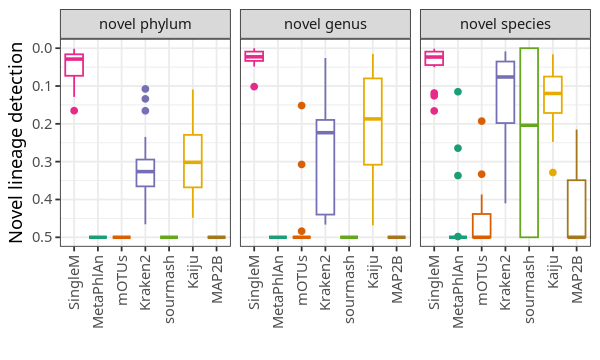

In [ ]:
options(repr.plot.width=5, repr.plot.height=3)
qplot(data=novelty_benchmark_results[rank=='kingdom' & novelty_category_novel %in% c('novel phylum','novel genus','novel species')], xlab='', tool2, value, geom='boxplot', colour=tool2, ylab='Novel lineage detection')+facet_grid(.~novelty_category_novel)+theme(legend.position='none') +scale_color_manual(breaks=tools2_order, values=my_colours)+scale_y_reverse() +theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust=0.5))
# ggsave('novel_lineage_detection.svg', width=5, height=3)

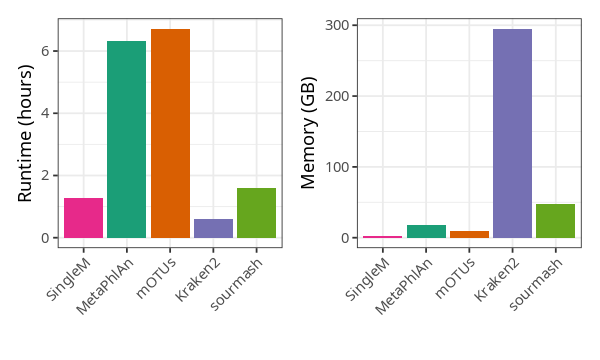

In [ ]:
plot32 + plot33